In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
ua = pd.read_csv('datas/mars_tianchi_user_actions.csv', parse_dates='Ds', date_parser=dateparse)
so = pd.read_csv('datas/mars_tianchi_songs.csv')

In [3]:
big = pd.merge(ua, so, on=['song_id'])
big.head()

,user_id,song_id,gmt_create,action_type,Ds,artist_id,publish_time,song_init_plays,language,gender
0,7063b3d0c075a4d276c5f06f4327cf4a,effb071415be51f11e845884e67c0f8c,1426406400,1,20150315,2ec1450a1389d4e3fc2a9a76c9378bb3,20110515,165494,1,2
1,57b36cad7d86cdc69e8f18138f8f4741,effb071415be51f11e845884e67c0f8c,1426424400,1,20150315,2ec1450a1389d4e3fc2a9a76c9378bb3,20110515,165494,1,2
2,dfa6fddc693133bbaa6ed1076d877557,effb071415be51f11e845884e67c0f8c,1426420800,1,20150315,2ec1450a1389d4e3fc2a9a76c9378bb3,20110515,165494,1,2
3,b2982712434c578eeffda9188f9d993b,effb071415be51f11e845884e67c0f8c,1426381200,1,20150315,2ec1450a1389d4e3fc2a9a76c9378bb3,20110515,165494,1,2
4,ef23d47c177f4cc9461752199da22877,effb071415be51f11e845884e67c0f8c,1426424400,2,20150315,2ec1450a1389d4e3fc2a9a76c9378bb3,20110515,165494,1,2


In [4]:
data = big[big.action_type == 1].groupby(['artist_id', 'Ds'])['action_type'].sum()

In [5]:
data.to_csv('datas/temp.csv')
data = pd.read_csv('datas/temp.csv', names=['artist_id', 'Ds', 'plays'], parse_dates='Ds', date_parser=dateparse, 
                   index_col='Ds')

In [221]:
aid = '023406156015ef87f99521f3b343f71f'
tset = data[data.artist_id == aid]
a = tset.pop('artist_id')
ts = tset.copy()

In [222]:
tset['dayofweek'] = tset.index.dayofweek.tolist()
tset['dayofmonth'] = [int(x[-2:]) for x in tset.index.to_native_types()]
tset['isworkday'] = [1 if x >= 0 and x <= 4 else 0 for x in tset['dayofweek']]
tset['isweekend'] = [1 if x >= 5 and x <= 6 else 0 for x in tset['dayofweek']]
tset['monthend'] = [1 if x >= 25 else 0 for x in tset['dayofmonth']]

tset['feast'] = [1 if x >= '2015-03-04' and x <= '2015-03-06' or x >= '2015-04-05' and x <= '2015-04-06' or 
                x >= '2015-05-01' and x <= '2015-05-03' or x >= '2015-06-20' and x <= '2015-06-22' or 
                x == '2015-08-20' else 0 for x in tset.index.to_native_types()]

tset = pd.concat([tset['20150301':'20150330'], tset['20150401':'20150530'], tset['20150601':'20150730'],
                     tset['20150801':]])
tset.head(10)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

,plays,dayofweek,dayofmonth,isworkday,isweekend,monthend,feast
Ds,,,,,,,
2015-03-01,482,6,1,0,1,0,0
2015-03-02,449,0,2,1,0,0,0
2015-03-03,474,1,3,1,0,0,0
2015-03-04,458,2,4,1,0,0,1
2015-03-05,398,3,5,1,0,0,1
2015-03-06,415,4,6,1,0,0,1
2015-03-07,550,5,7,0,1,0,0
2015-03-08,453,6,8,0,1,0,0
2015-03-09,411,0,9,1,0,0,0


In [223]:
train_set = tset['20150301':'20150731']
test_set = tset['20150801':'20150830']

In [224]:
train_label = np.array(train_set.pop('plays').tolist())

In [225]:
train_set_data = np.array([np.array(train_set.ix[i].tolist()) for i in train_set.index])

In [226]:
test_label = np.array(test_set.pop('plays').tolist())
test_set_data = np.array([np.array(test_set.ix[i].tolist()) for i in test_set.index])

In [227]:
from sklearn.tree import DecisionTreeRegressor

In [228]:
# model
regr = DecisionTreeRegressor(max_depth=10)
# train
regr.fit(train_set_data, train_label)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [229]:
pred = regr.predict(test_set_data)

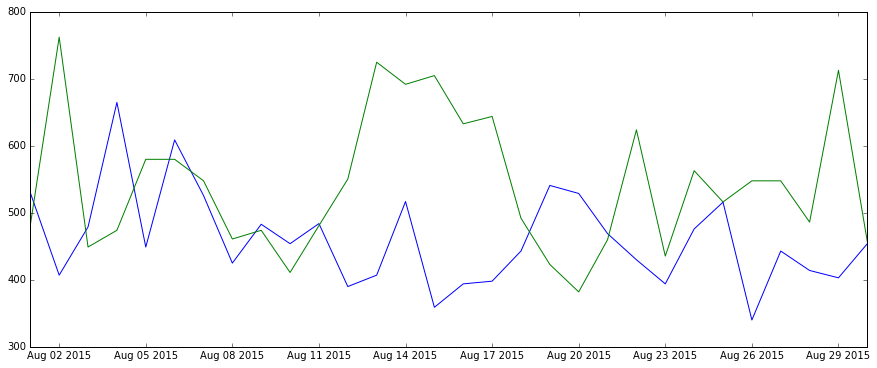

In [230]:
plt.plot(pd.date_range('20150801', '20150830'), test_label)
plt.plot(pd.date_range('20150801', '20150830'), pred)

In [18]:
ts_log = np.log(ts)

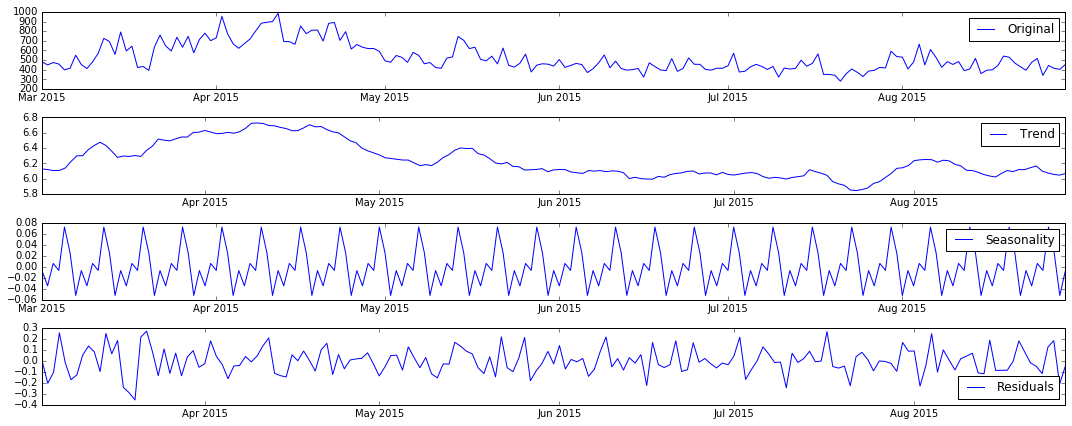

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [231]:
resi_train_label = residual30['20150301':'20150731']

In [232]:
resi_train_label.fillna(resi_train_label.mean(), inplace=True)
resi_train_label = np.array(resi_train_label['plays'])

In [233]:
resi_test_label = residual['20150801':'20150830']
resi_test_label.fillna(resi_test_label.mean(), inplace=True)
resi_test_label = np.array(resi_test_label['plays'])

In [234]:
# model
regr2 = DecisionTreeRegressor(max_depth=100)
# train
regr2.fit(train_set_data, resi_train_label)

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [235]:
resi_pred = regr2.predict(test_set_data)

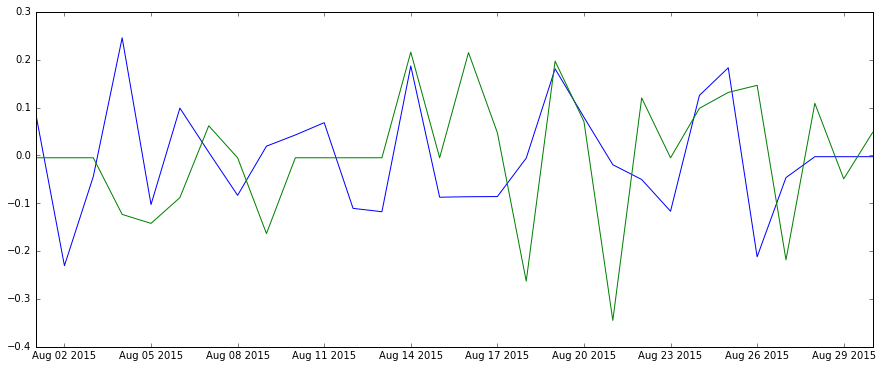

In [236]:
plt.plot(pd.date_range('20150801', '20150830'), resi_test_label)
plt.plot(pd.date_range('20150801', '20150830'), resi_pred)

In [237]:
from sklearn.ensemble.forest import RandomForestRegressor

In [238]:
rfr = RandomForestRegressor(n_estimators=100)

In [239]:
rfr.fit(train_set_data, resi_train_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [240]:
rf_pred = rfr.predict(test_set_data)

RMSE: 0.1381
RMSE: 0.1651


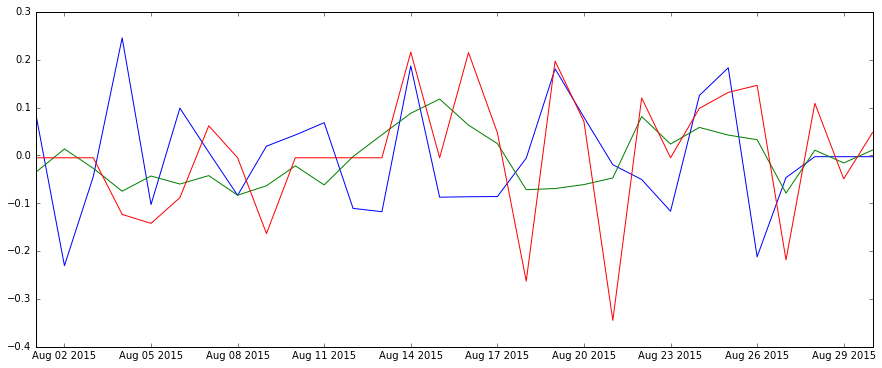

In [241]:
plt.plot(pd.date_range('20150801', '20150830'), resi_test_label)
plt.plot(pd.date_range('20150801', '20150830'), rf_pred)
plt.plot(pd.date_range('20150801', '20150830'), resi_pred)
print 'RMSE: %.4f'% np.sqrt(sum((rf_pred-resi_test_label)**2)/len(resi_test_label))
print 'RMSE: %.4f'% np.sqrt(sum((resi_pred-resi_test_label)**2)/len(resi_test_label))

In [220]:
rfr.feature_importances_

array([ 0.29127732,  0.61927188,  0.01979728,  0.02249   ,  0.04716351])

In [50]:
tmp = residual + trend
tmp.fillna(tmp.mean(), inplace=True)
print ''

In [51]:
ts30_log = pd.concat([tmp['20150301':'20150330'], tmp['20150401':'20150530'], tmp['20150601':'20150730'],
                     tmp['20150801':]])

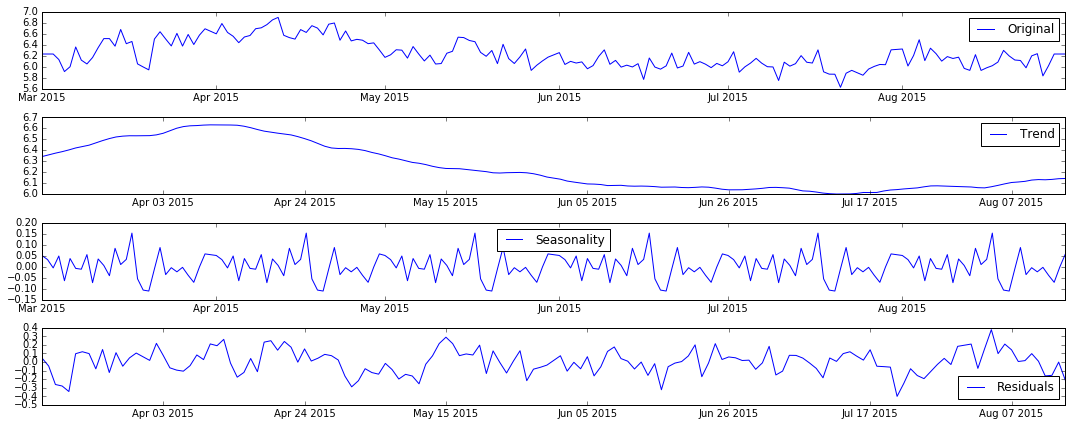

In [52]:
decomposition30 = seasonal_decompose(ts30_log, freq=30)

trend30 = decomposition30.trend
seasonal30 = decomposition30.seasonal
residual30 = decomposition30.resid

plt.subplot(411)
plt.plot(ts30_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend30, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal30,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual30, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

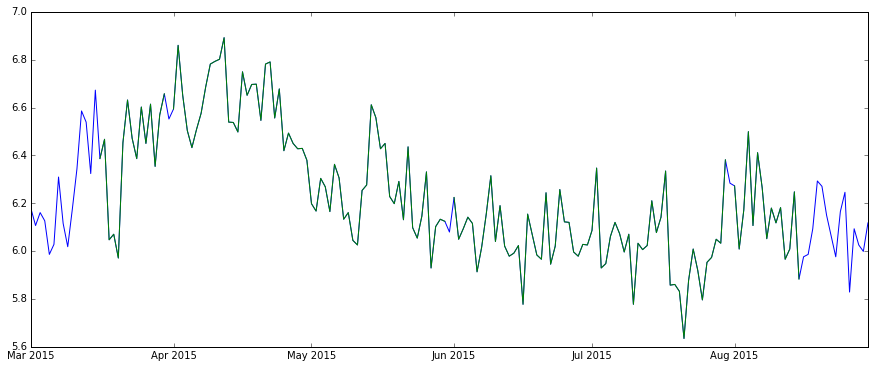

In [54]:
plt.plot(ts_log)
plt.plot(residual30 + trend30 + seasonal30 + seasonal)

In [61]:
residual30.fillna(residual30.mean(), inplace=True)
len(residual30)

180